In [38]:
import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision import datasets, transforms

In [42]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# C:/Users/USER/Desktop/Semester2/Statistical-ML/Project3_TeamProject

# 이미지 폴더로부터 데이터를 로드합니다.
dataset = ImageFolder(root='C:/Users/USER/Desktop/Semester2/Statistical-ML/Project3_TeamProject/train_data',                   # 다운로드 받은 폴더의 root 경로를 지정합니다.
                      transform=transforms.Compose([
                          transforms.ToTensor(), 
                      ]))

data_loader = DataLoader(dataset, 
                         batch_size=32, 
                         shuffle=True,
                         num_workers=4
                        )

In [43]:
dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

import gc
import torch

gc.collect()
torch.cuda.empty_cache()  # GPU 메모리 초기화 (GPU 사용 시)


In [46]:
images, labels = next(iter(data_loader))

In [37]:
images[0].shape

torch.Size([3, 32, 32])

In [47]:
images.shape

torch.Size([32, 3, 32, 32])

In [48]:
len(images)

32

In [49]:
dataset.class_to_idx.items()

dict_items([('airplane', 0), ('automobile', 1), ('bird', 2), ('cat', 3), ('deer', 4), ('dog', 5), ('frog', 6), ('horse', 7), ('ship', 8), ('truck', 9)])

In [50]:
torch.randint(len(images), size=(1,))

tensor([31])

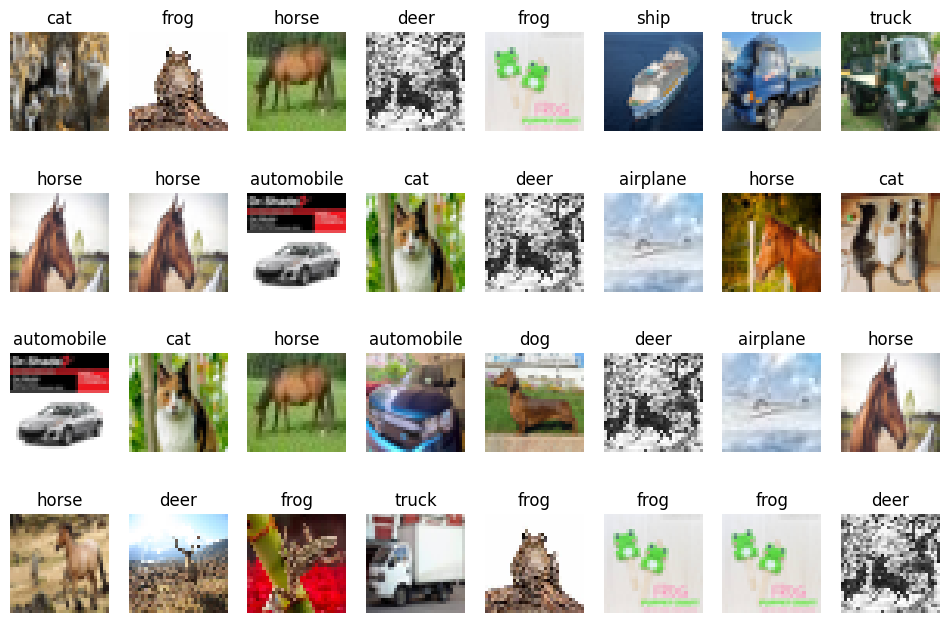

In [51]:
import matplotlib.pyplot as plt

# 클래스 인덱스를 각 클래스 이름에 매핑하는 딕셔너리를 생성합니다.
# 'class_to_idx'는 클래스 이름을 키, 인덱스를 값으로 갖는 딕셔너리이므로
# 이를 뒤집어 'labels_map'을 만들어, 키가 인덱스이고 값이 클래스 이름이 되도록 합니다.
labels_map = {k: v for v, k in dataset.class_to_idx.items()}

# 이미지를 보여줄 12x8 인치 크기의 figure를 초기화합니다.
figure = plt.figure(figsize=(12, 8))

# 이미지 그리드의 열과 행 수를 설정합니다.
cols, rows = 8, 4

# 'cols * rows' 만큼의 이미지(이 경우 32개)를 표시하는 반복문을 생성합니다.
for i in range(1, cols * rows + 1):
    # 무작위로 선택된 이미지의 인덱스를 가져옵니다.
    sample_idx = torch.randint(len(images), size=(1,)).item()
    
    # 선택한 이미지와 해당 레이블을 가져옵니다.
    img, label = images[sample_idx], labels[sample_idx].item()
    
    # figure에 서브플롯을 추가합니다.
    figure.add_subplot(rows, cols, i)
    
    # 이미지 위에 레이블을 제목으로 표시합니다.
    plt.title(labels_map[label])
    
    # 축을 숨겨서 깔끔한 이미지 표시를 합니다.
    plt.axis("off")
    
    # 원본 이미지의 shape이 (3, 32, 32)인 경우,
    # imshow() 함수로 시각화하기 위해 shape을 (32, 32, 3)으로 변경합니다.
    plt.imshow(torch.permute(img, (1, 2, 0)))

# 설정한 이미지를 모두 출력합니다.
plt.show()